# Iron Chef Battle Royale - The Tournament of the Century!



Well, well, well. The end is nigh. The best chefs from around the world have been summoned for one last extravagant test of wits and strength: a cooking battle royale!

You will all enter the arena and battle each other. Your team consists of ``n`` chefs, all of which will be randomly distributed in the arena.

* Your task is to create one python class, named after your team's name, with the attributes and methods shown in the code snippets below. You will submit your class script to us and we will run the final battle with all classes put together.
* Your chefs will all be instances of your class. All chefs must belong to the same class.
* Chefs in the arena will take turns one at a time. Order will be randomly determined.
* When it is a chef's turn, they can decide wether to move to a neighboring space or not. If the space is occupied by another chef, a battle ensues.
* A 1-1 battle consists of picking one of three secret ingredients: Ras el hanout (R), Peppermint chocolate (P), and Spicy habanero (S).
* The outcome of each competition will be determined by a set of capricious and idiosyncratic judges, whose combined preferences have produced the following circular logic:
  * R beats S, S beats P, and P beats R.
  * If two chefs pick the same ingredient, they tie.
  * If the attacking chef wins, they move to the defender's cell, and the defender is out of the competition (their team loses a member). If the defender wins, the attacker is out of the competition. The defender stays in their spot.
* Chefs can choose their apron color and hat shape among the allowed colors and shapes (see details under ``appearance()``below).
* The only information regarding neighboring chefs are their apron color and hat shape. Use this information to strategize your ingredient selection!
* You can choose your movement rules. More information on movement below.
* This battle royale is rudeless: if your chefs don't return the expected outputs, they will be disqualified!!




## Movement details

The arena is just an NxN grid. The "neighbors" of your chef will be the eight cells surrounding it: left, righ, up, down, and diagonals. Like this:

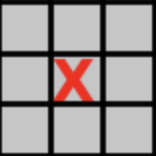

You can think of the positions as indexed from 0 to 8. Like this:

| 0 | 1 | 2 |

| 3 | 4 | 5 |

| 6 | 7 | 8 |

Your chef will consider itself to be in "4", and when it decides where to move, it must output one of the numbers in [0,8] (4 if they don't want to move).


## Note about classes

You must have at least the methods and attributes provided in the example teams:

* ``index``
  * this attribute is determined at initialization and given by the user. It will be how the tournament organizers keep track of each chef. You can think of it as the chef ID.
* ``move()``
  * Must return an integer in [0,8].
  * Takes as arguments the current coordinates in the grid (matrix indexing), and a list of neighbor appearances, where the first entry is the appearance of neighbor "0", the second is neighbor "1", and so on, following the logic of the neighborhood grid.
* ``appearance()``
  * Must return a list with two strings, the first one corresponds to the hat shape, the second one to the apron color. For hat shape use a standard 1-character string, for example ``'>'`` or ``'T'``. For apron color you can use matplotlib [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html).
* ``cook()``
  * Returns the ingredient you select for that battle.
  * Takes as arguments the opponent's hat shape and apron color
* ``record_outcome()``
  * Optional, you can record the outcome of the battle if you want to learn your opponent's strategies.
  * Takes as arguments the opponent's hat shape and apron color, the ingredients you and your opponent chose, and an indicator of who won (-1 for loss, 0 for tie, 1 for win).






## The Arena
Finally, the arena will be an NxN grid. It looks like the following image (it has been populated by default chef teams):

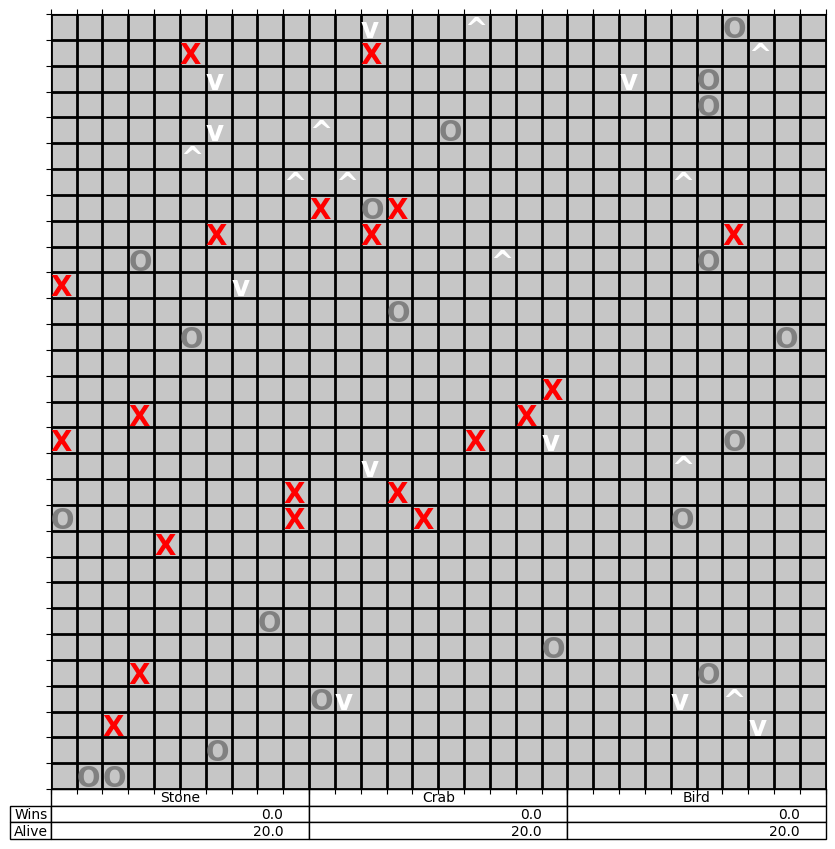

## Imports

In [ ]:
# Remember to import the packages that we need
import numpy as np
import random
import matplotlib.pyplot as plt
import IPython.display as display

# Definitions


## Chef Classes
The class GenericChef is a generic template for your class. GenericChefDocumented is the same but with detailed description in case you need it. The classes Stone, Crab, and Bird, are fully functional classes of simple chefs. The class Harvester is a functional chef class with slightly more complexity.

In [ ]:
#Stones don't move, look like gray O's, and always pick Ras el hanout (R)
class Stone:
  def __init__(self, chef_ID):
    self.chef_ID = chef_ID

  def move(self, myPos, neighbors):
    return 4 ; # Stone chefs never move, so they always return self position:

  def appearance(self):
    return ['O','gray']

  def cook(self, opp_shape, opp_color):
    return 'R'

  def record_outcome(self, opp_shape, opp_color, you_threw, opp_threw, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

In [ ]:
#Crabs move right, look like red X's, and always pick Spicy habanero (S)
class Crab:

  def __init__(self, chef_ID):
    self.chef_ID = chef_ID

  def move(self, myPos, neighbors):
    return 5 ; # Crab chefs always move right, so they always return 5:

  def appearance(self):
    return ['X','red']

  def cook(self, opp_shape, opp_color):
    return 'S'

  def record_outcome(self, opp_shape, opp_color, you_threw, opp_threw, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

In [ ]:
#Birds alternate moving up and right, look like white ^'s and v's (they flap their wings)
  # and they always pick Peppermint chocolate (P)
class Bird:
  bird_moves = [1,5]
  bird_shapes = ["^", "v"]
  bird_states = [0,1]

  def __init__(self, chef_ID):
    self.chef_ID = chef_ID
    self.state = np.random.choice(self.bird_states)
    self.hat_shape = self.bird_shapes[self.state]

  def move(self, myPos, neighbors):
    # Bird chefs alternate moving up (1) and right (5)
    move_to = self.bird_moves[self.state]
    self.state = (self.state + 1)%2 # alternate states
    return move_to

  def appearance(self):
    self.hat_shape = self.bird_shapes[self.state]
    return [self.hat_shape,'orchid'] ;

  def cook(self, opp_shape, opp_color):
    return 'P' ;

  def record_outcome(self, opp_shape, opp_color, you_threw, opp_threw, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

In [ ]:
class Harvesters:
  def __init__(self, chef_ID):
    self.chef_ID = chef_ID

  def move(self, myPos, neighbors):
    # Harvesters movement is more complex:
    for neigh_indx, neighbor in enumerate(neighbors):
      if neighbor and neighbor[0]!='H': # If neighboring cell not empty and not one of own
        return neigh_indx
    # If the above doesn't return, then only empty spaces and/or own species, so:
      # Move diagonally to maximize discovery (could run into own species)
    move = np.random.choice([0,2,6,8])
    return move


  def appearance(self):
    return ['H','blue'] ;

  def cook(self, opp_shape, opp_color):
    # Beat the default creatures, tie itself, otherwise random. vulnerable to mimics
    if opp_shape=='O' and opp_color == 'gray':
      return 'P'
    if (opp_shape=='^' or opp_shape =='v') and opp_color == 'white':
      return 'S'
    if opp_shape=='X' and opp_color == 'red':
      return 'R'
    if opp_shape=='H' and opp_color == 'blue':  #tie when run into my own kind
      return 'R'
    else:
      return np.random.choice(['R','P','S'])


  def record_outcome(self, opp_shape, opp_color, you_threw, opp_threw, win_loss_tie):
    return

  def __repr__(self):
    return f"{type(self).__name__}(ID = {self.chef_ID})"

## Tournament Class

In [ ]:
class Tournament:
  wins = [['R','S'],['S','P'],['P','R']] # A list of winning conditions for the attacker (current chef)
  losses = [['R','P'],['P','S'],['S','R']] # A list of losing conditions for the attacker
  def __init__(self, N):
    self.arena = -1*np.ones([N,N])
    self.score_board = []

  def register(self, chef_ID):
    [x,y] = random.choice(np.argwhere(self.arena == -1))
    self.arena[x,y] = chef_ID

  def initialize_score_board(self, teams, team_size):
    n_teams = len(teams)
    winCounts = np.zeros(n_teams)
    alive = team_size * np.ones(n_teams)
    winCountsT = []
    aliveT = []
    names = []
    for tm in teams:
      name = tm.__name__
      names.append(name)
      winCountsT.append([0])
      aliveT.append([team_size])
    self.score_board = {"winCounts":winCounts, "winCountsT":winCountsT,
                        "alive":alive, "aliveT":aliveT,
                        "names":names}

  def update_score_board(self):
    for s in range(len(self.score_board["names"])):
      tourney.score_board["aliveT"][s].append(self.score_board["alive"][s])
      tourney.score_board["winCountsT"][s].append(self.score_board["winCounts"][s])
    return

  def determine_outcome(self, attackerThrow, defenderThrow, current_chef, target, i,j, ti,tj):
    #has a problem if both throw non-allowed letters, favors the attacker
    matchup = [attackerThrow, defenderThrow]
    win_loss_tie = 0 # -1 for a loss, 0 for a tie, 1 for a win
    if matchup in self.wins or defenderThrow not in ['R','P','S']: # If the attacker wins,
      # The attacker moves into the next position (erasing the opposing neighbor that was in the way)
      tourney.arena[ti,tj] = current_chef.chef_ID
      tourney.arena[i,j] = -1
      self.speciesWins(current_chef.__class__.__name__) # increase the win count
      self.speciesLoses(target.__class__.__name__) #decrease the living count
      win_loss_tie = 1
    elif matchup in self.losses or attackerThrow not in ['R','P','S']: # If the attacker loses,
      tourney.arena[i,j] = -1 # The attacker is erased from the board
      self.speciesWins(target.__class__.__name__)
      self.speciesLoses(current_chef.__class__.__name__)
      win_loss_tie = - 1
      #else: #with a tie, no change

    return win_loss_tie;

  def speciesWins(self, speciesName):
    for s in range(len(self.score_board["names"])):
      if self.score_board["names"][s] == speciesName:
        self.score_board["winCounts"][s] += 1

  def speciesLoses(self,speciesName):
    for s in range(len(self.score_board["names"])):
      if self.score_board["names"][s] == speciesName:
        self.score_board["alive"][s] -= 1

# Initialize

In [ ]:
def initialize(player_teams = [], N = 30, team_size = 20):
  global tourney, all_chefs, teams

  ## :: -- TOURNAMENT AND ARENA -- ::
  tourney = Tournament(N)

  ## :: -- TEAM REGISTRATION -- ::
  # Register teams
  teams = [Stone, Crab, Bird] # <-- modify this when players input their own teams
  for sp in player_teams:
    teams.append(sp)

  # Register individuals
  all_chefs = []
  for team_idx, tm in enumerate(teams):
    for i_idx in range(team_size):
      chef_ID = i_idx + team_idx * team_size
      all_chefs.append(tm(chef_ID))
      tourney.register(chef_ID)

  # -- :: SCORE BOARD :: --
  tourney.initialize_score_board(teams, team_size)

# Observe

In [ ]:
def observe():
  global tourney, all_chefs

  N = len(tourney.arena)

  # plt.cla()
  display.clear_output(wait = True)

  background = -1*np.ones(np.shape(tourney.arena))
  plt.matshow(background, cmap = plt.cm.Greys,vmin = -2, vmax = 1)

  ax = plt.gca()
  ax.set_xticks(np.arange(-.5, N, 1))
  ax.set_yticks(np.arange(-.5, N, 1))
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  ax.grid(color='k', linestyle='-', linewidth=2)

  fig = plt.gcf()
  fig.set_figwidth(10)
  fig.set_figheight(10)

  for i in range(N):
    for j in range(N):
      if tourney.arena[i,j] != -1:
        chef_ID = int(tourney.arena[i,j])
        hat_shape, apron_color = all_chefs[chef_ID].appearance()
        plt.text(j-0.5,i+0.4, hat_shape, color = apron_color, fontsize = 20, fontweight = 'bold')

  fig2 = plt.figure(1)
  plt.table([tourney.score_board["winCounts"], tourney.score_board["alive"]],
            rowLabels = ['Wins', 'Alive'],
            colLabels = tourney.score_board["names"])

  plt.show()

In [ ]:
def observe_evolution():
  global tourney, teams

  plt.figure()
  for s in range(len(teams)):
    plt.plot(tourney.score_board["winCountsT"][s],
             label = tourney.score_board["names"][s],
             linewidth = 2)
  plt.legend()
  plt.title('Wins')
  ax = plt.gca()
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  plt.figure()
  for s in range(len(teams)):
    plt.plot(tourney.score_board["aliveT"][s],
             label = tourney.score_board["names"][s],
             linewidth = 2)
  plt.legend()
  plt.title('Number Alive')
  plt.yticks(range(0,21,2))
  ax = plt.gca()
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
#for whole-class giant sim, to better see final results
def observe_table(nsplit = 2):
  global tourney
  fig3 = plt.figure(figsize = [15,.01])
  plt.xticks([])
  plt.yticks([])
  plt.table([tourney.score_board["winCounts"][:nsplit],
             tourney.score_board["alive"][:nsplit]],
            rowLabels = ['Wins', 'Alive'],
            colLabels = tourney.score_board["names"][:nsplit])

  fig4 = plt.figure(figsize = [15,.01])
  plt.xticks([])
  plt.yticks([])
  plt.table([tourney.score_board["winCounts"][nsplit:],
             tourney.score_board["alive"][nsplit:]],
            rowLabels = ['Wins', 'Alive'],
            colLabels = tourney.score_board["names"][nsplit:])

  plt.show()

# Mid Testing

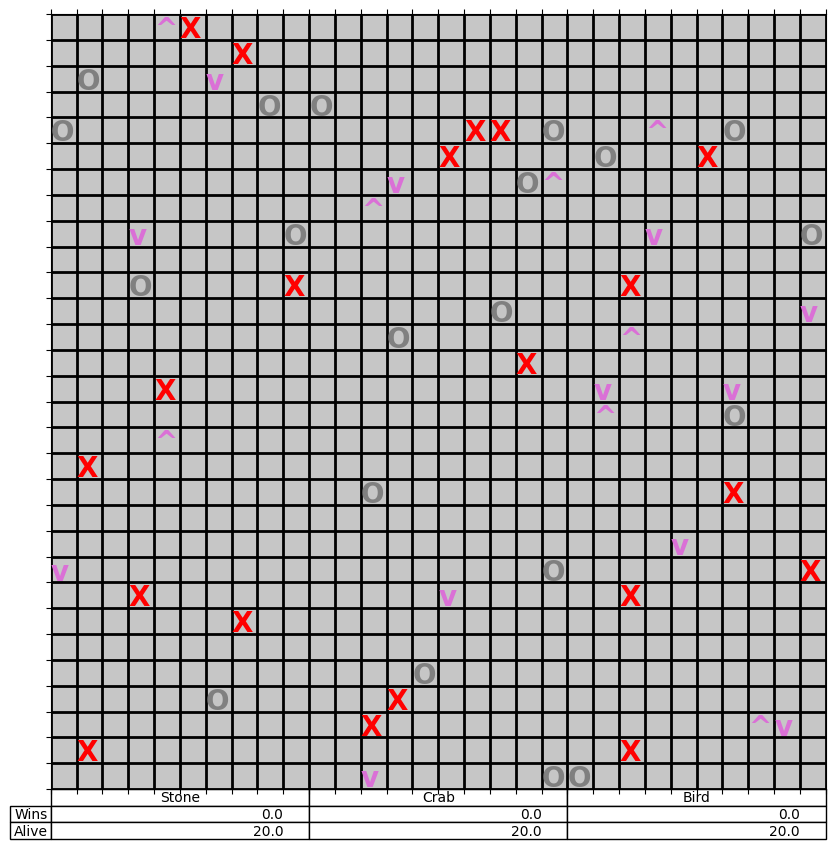

In [ ]:
initialize()
observe()

# Update

In [ ]:
def update(i,j):
  global tourney, all_chefs
  N = len(tourney.arena)
  #[i,j] differences from a central square
  #012
  #345
  #678
  directions = [[-1,-1],[-1,0],[-1,1],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]]

  # get chef located at (i,j)
  chef_ID = int(tourney.arena[i,j])
  current_chef = all_chefs[chef_ID]

  # get neighboring chefs
  neighbors = get_neighbors(i,j,N,directions)

  # candidate next position
  chef_move = current_chef.move([i,j], neighbors)
  vec = directions[chef_move]
  ti = (i + vec[0])%N
  tj = (j + vec[1])%N

  if vec != [0,0]: # If we don't want to stay still
    resident = int(tourney.arena[ti,tj]) # Check the target square
    if resident == -1:
      tourney.arena[ti,tj] = chef_ID # If empty, move there
      tourney.arena[i, j] = -1
    else:
      target = all_chefs[resident] # Find the opponent in the chef list
      attacker_ingredient, defender_ingredient = cook_off(current_chef, target) # Cook-off!
      win_loss_tie = tourney.determine_outcome(attacker_ingredient, defender_ingredient, current_chef, target, i,j, ti,tj) # Judges
      record_outcomes_all(current_chef, target, attacker_ingredient, defender_ingredient, win_loss_tie) # Teams record the outcomes

    tourney.update_score_board()

In [ ]:
def get_neighbors(i,j,N,directions):
  global tourney
  # Make the neighbors list to inform the current_chef of its surroundings
    # 9 entries, corresponding to the 9 directions, holding empty lists or [face,color] appearances
  neighbors = []
  for diff in directions:
    nx = (i + diff[0])%N
    ny = (j + diff[1])%N
    if tourney.arena[nx,ny] == -1: # empty space
      neighbors.append([])
    else:
      neigh_ID = int(tourney.arena[nx,ny])
      neighbor = all_chefs[neigh_ID]
      neighbors.append(neighbor.appearance())
  return neighbors

In [ ]:
def cook_off(current_chef, target):
  capp = current_chef.appearance()
  tapp = target.appearance()
  attacker_ingredient = current_chef.cook(tapp[0],tapp[1])
  defender_ingredient = target.cook(capp[0],capp[1])
  return attacker_ingredient, defender_ingredient;

In [ ]:
def record_outcomes_all(current_chef, target, attacker_ingredient, defender_ingredient, win_loss_tie):
  # Tell each chef what happened, so the team can learn if it wants
  current_chef.record_outcome(target.appearance()[0],target.appearance()[1], attacker_ingredient, defender_ingredient, win_loss_tie)
  target.record_outcome(current_chef.appearance()[0],current_chef.appearance()[1], defender_ingredient, attacker_ingredient, -win_loss_tie)


In [ ]:
def update_all():
  global tourney
  occupied = np.argwhere(tourney.arena != -1)
  visit_order = np.random.permutation(occupied)
  for i,j in visit_order:
    update(i,j)

# Final Testing

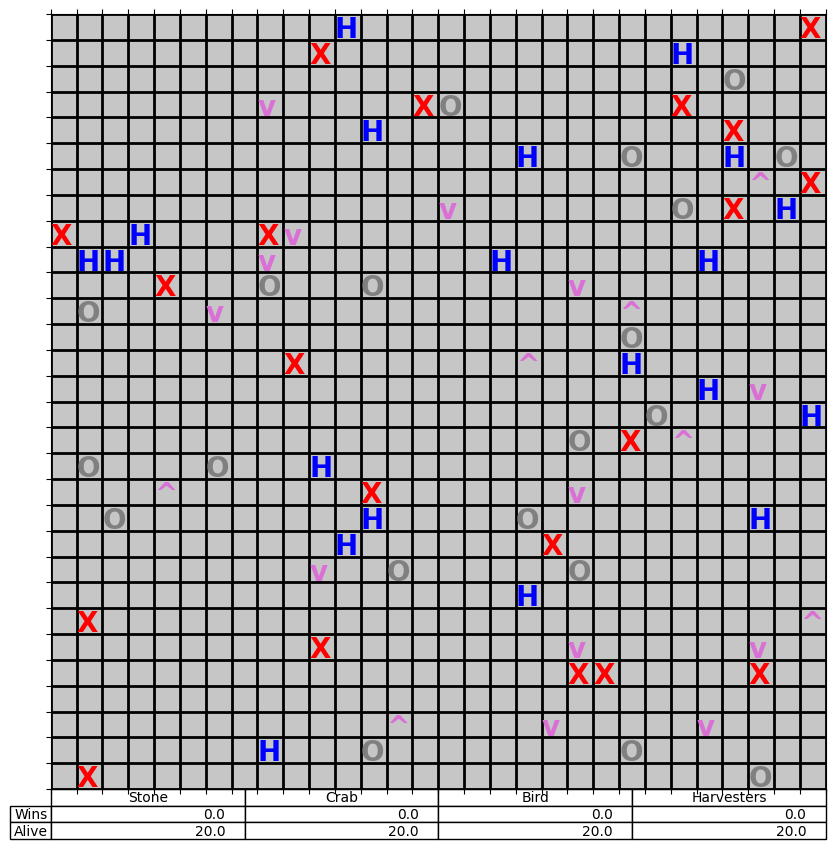

In [ ]:
initialize([Harvesters])
observe()

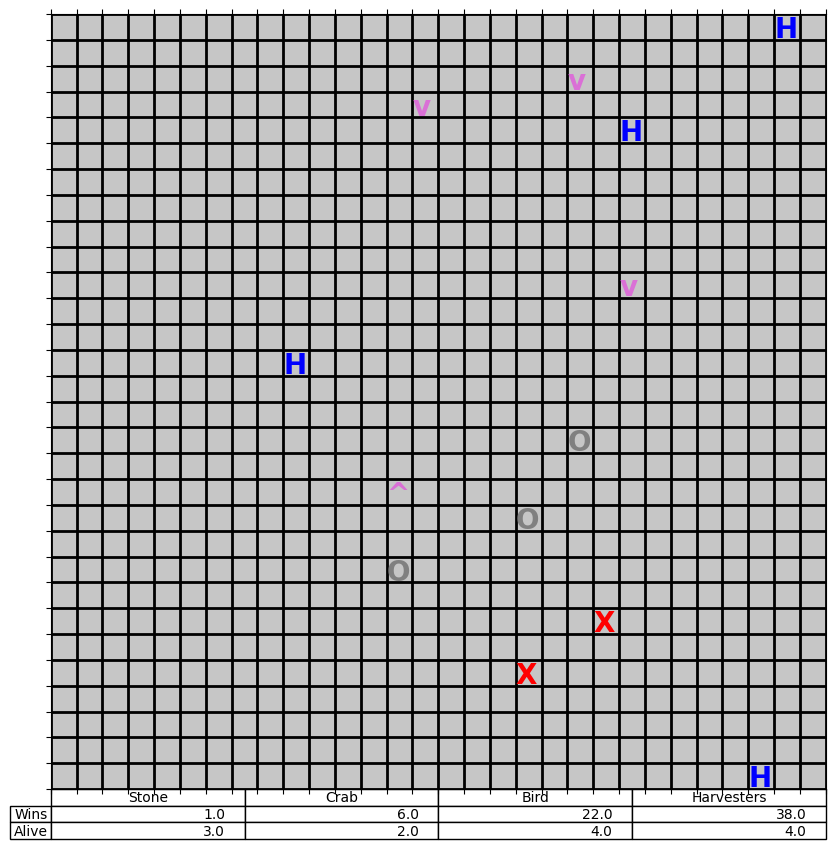

In [ ]:
T = 50
for t in range(T):
  update_all()
  observe()

# Scoring



## Round 1

Win your group: +10

Second Place in your group (if obvious): +5

## Round 2

Win the Finals: +10

Second Place in the Finals: +5

##Bonus

Beat the organizer's secret team: +10

# Acknowledgements